In [1]:
import os
import xml.etree.ElementTree as ex

os.environ["CUDA_VISIBLE_DEVICES"]="2"

sample_labels = ["AD", "LMCI", "EMCI", "CN"]
label_cat = {}

# This is for getting ADNI files
def get_filenames(folder, metadata_folder):
    global label_cat
    for i, label in enumerate(sample_labels):
        label_cat[label] = i
         
    # Get list of images
    image_class = {} # key: unique subject id in filename
                     # value: image file path
    for root, directories, filenames in os.walk(folder):
        for filename in filenames:
            if filename.endswith("nii") and "__Scaled_2" not in root:
                identifier = filename[-11:-4]
                image_class[identifier] = os.path.join(root,filename)
                
    meta_files = [f for f in os.listdir(metadata_folder) if f.endswith('xml')]
        
    # Label each image
    classify_by_label = {} # key: label class in [0, 1, 2, 3]
                           # value: image file path
    for xml in meta_files:
        if "__Scaled_2" not in xml:
            identifier = xml[-11:-4]
            root = ex.parse(metadata_folder + "/" + xml).getroot()
            classification = root[0][3][1].text
            if classification in label_cat:
                cl = label_cat[classification]
                if cl not in classify_by_label:
                    classify_by_label[cl] = [image_class[identifier]]
                else:
                    classify_by_label[cl].append(image_class[identifier])

    print("Statistics: {}".format(get_stats(classify_by_label)))
    
    return classify_by_label

def get_stats(files):
    stats = {}
    for k, v in files.items():
        stats[sample_labels[int(k)]] = len(v)
    return stats


In [2]:
import matplotlib.pyplot as plt
from nilearn import image
import nibabel as nib
import numpy as np
import tensorflow as tf
from scipy import ndimage as nd

def get_files(data_folder, metadata_folder):
    files = get_filenames(data_folder, metadata_folder)
    return files

In [3]:
import matplotlib

files = get_files('ADNI2/ADNI', 'ADNI2/metadata')
flattened = []
for k, v in files.items():
    for f in v[0:int(len(v))]:
        flattened.append((f, k))
loaded_img = nib.load(flattened[0][0])



Statistics: {'LMCI': 37, 'AD': 49, 'CN': 51, 'EMCI': 59}


In [30]:
loaded_img_alz = nib.load(flattened[1][0])
loaded_img_lmci = nib.load(flattened[53][0])
loaded_img_emci = nib.load(flattened[-52][0])
loaded_img_normal = nib.load(flattened[-2][0])


In [31]:
from scipy import ndimage as nd
im_ad = loaded_img_alz.get_data()
im_cn = loaded_img_normal.get_data()
im_emci = loaded_img_emci.get_data()
im_lmci = loaded_img_lmci.get_data()

mx_alz = im_ad.max(axis=0).max(axis=0).max(axis=0)
mx_normal = im_cn.max(axis=0).max(axis=0).max(axis=0)
mx_emci = im_emci.max(axis=0).max(axis=0).max(axis=0)
mx_lmci = im_lmci.max(axis=0).max(axis=0).max(axis=0)

im_ad_with_mx = im_ad/mx_alz
im_normal_with_mx = im_cn/mx_normal
im_emci_with_mx = im_emci/mx_emci
im_lmci_with_mx = im_lmci/mx_lmci

# range_cool = np.percentile(im_ad, 90) - np.percentile(im_ad, 10)
# mean_cool = np.mean(im_ad)
# im_ad_std = np.asarray((im_ad - mean_cool)/range_cool, dtype=np.float32)

# range_cool = np.percentile(im_cn, 90) - np.percentile(im_cn, 10)
# mean_cool = np.mean(im_cn)
# im_cn_std = np.asarray((im_cn - mean_cool)/range_cool, dtype=np.float32)

# im2 = nd.interpolation.zoom( im1, 
#                         zoom = np.array( [ 60, 60, 60 ] ) / im1.shape )
# assert( all( [ a == 55 for a in im2.shape ] ) )


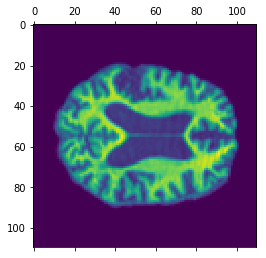

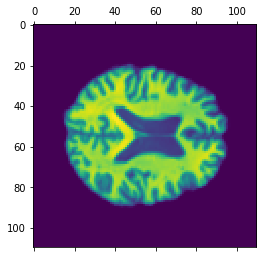

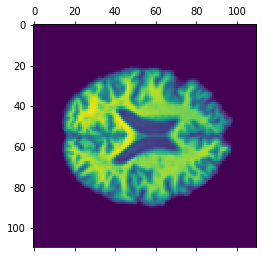

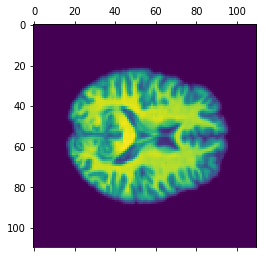

In [32]:
import matplotlib.pyplot as plt
plt.matshow( im_ad[:,:,60] )
plt.show()

plt.matshow(im_lmci[:,:,60])
plt.show()

plt.matshow( im_emci[:,:,60] )
plt.show()

plt.matshow(im_cn[:,:,60])
plt.show()

In [22]:
im_ad_swap = np.swapaxes(im_ad, 0, 2)
im_ad_rot = np.rot90(im_ad_swap, k=2, axes=(0, 1))

im_lmci_swap = np.swapaxes(im_lmci, 0, 2)
im_lmci_rot = np.rot90(im_lmci_swap, k=2, axes=(0, 1))

im_emci_swap = np.swapaxes(im_emci, 0, 2)
im_emci_rot = np.rot90(im_emci_swap, k=2, axes=(0, 1))

im_cn_swap = np.swapaxes(im_cn, 0, 2)
im_cn_rot = np.rot90(im_cn_swap, k=2, axes=(0, 1))

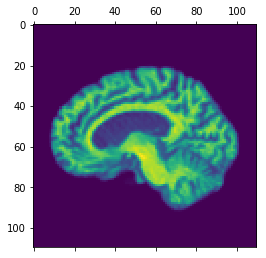

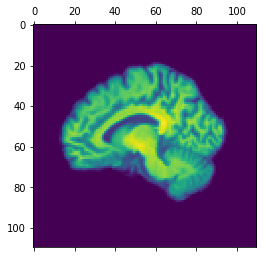

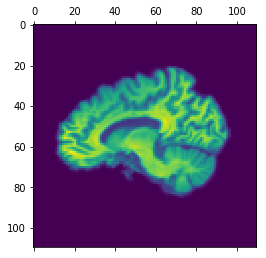

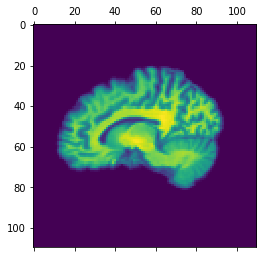

In [23]:
plt.matshow(im_ad_rot[:, :, 60])
plt.show()

plt.matshow(im_lmci_rot[:, :, 60])
plt.show()

plt.matshow(im_emci_rot[:, :, 60])
plt.show()

plt.matshow(im_cn_rot[:, :, 60])
plt.show()